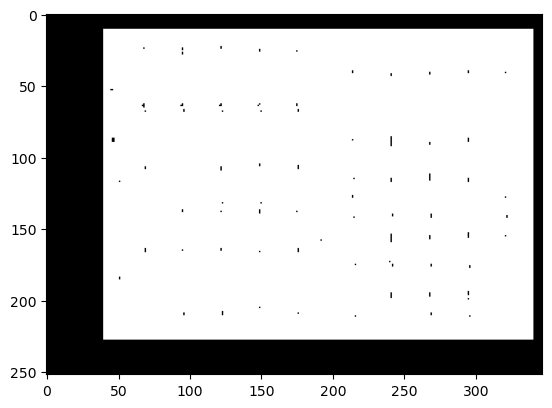

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to input image
image_path = 'test.jpg'

# Load the input image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Failed to load image '{image_path}'")
    exit()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu thresholding
ret, thresh = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.show()


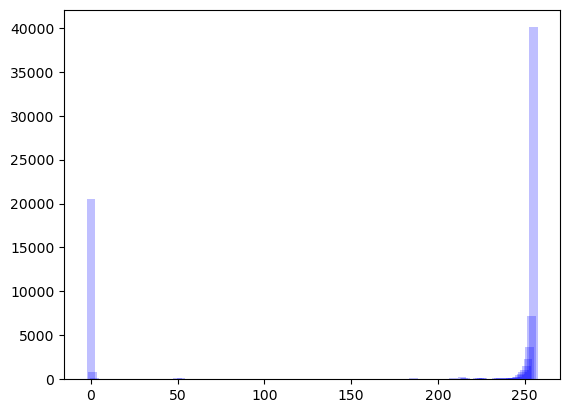

Optimal threshold: 140


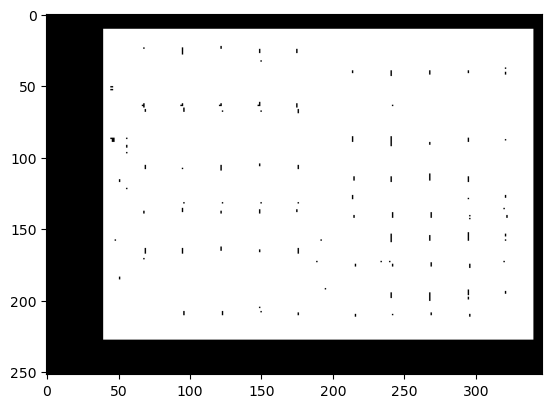

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def hist(img):
    row, col = img.shape
    y = np.zeros(256)
    for i in range(row):
        for j in range(col):
            y[img[i, j]] += 1
    x = np.arange(256)
    plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
    plt.show()
    return y

def regenerate_img(img, threshold):
    row, col = img.shape
    y = np.zeros((row, col))
    for i in range(row):
        for j in range(col):
            if img[i, j] >= threshold:
                y[i, j] = 255
            else:
                y[i, j] = 0
    return y

def count_pixel(h):
    cnt = 0
    for i in range(len(h)):
        if h[i] > 0:
            cnt += h[i]
    return cnt

def weight(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w

def mean(s, e):
    m = 0
    w = weight(s, e)
    for i in range(s, e):
        m += h[i] * i
    return m / float(w)

def variance(s, e):
    v = 0
    m = mean(s, e)
    w = weight(s, e)
    for i in range(s, e):
        v += ((i - m) ** 2) * h[i]
    v /= w
    return v

def find_threshold(h):
    cnt = count_pixel(h)
    threshold_values = {}
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = weight(0, i) / float(cnt)
        mb = mean(0, i)

        vf = variance(i, len(h))
        wf = weight(i, len(h)) / float(cnt)
        mf = mean(i, len(h))

        V2w = wb * (vb) * (vb) + wf * (vf) * (vf)
        V2b = wb * wf * (mb - mf) ** 2

        threshold_values[i] = V2w

    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w][0]
    print('Optimal threshold:', optimal_threshold)
    return optimal_threshold

image = Image.open('test.jpg').convert("L")
img = np.asarray(image)

h = hist(img)
op_threshold = find_threshold(h)

result = regenerate_img(img, op_threshold)
plt.imshow(result, cmap='gray')
plt.savefig("otsu.jpg")
plt.show()


In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('e.png')
img=res
img = np.full((1130,1566), 6, np.uint8)
converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
dst = cv.fastNlMeansDenoisingColored(converted_img,None,10,10,7,21)

NameError: name 'res' is not defined

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#cap = cv.VideoCapture('vtest.avi')
# create a list of first 5 frames
#img = [cap.read()[1] for i in xrange(5)]
# convert all to grayscale
i=res
#gray = cv.cvtColor(i, cv.COLOR_BGR2GRAY)
# convert all to float64
gray = np.float64(i)
# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10
# Add this noise to images
noisy = i+noise 
# Convert back to uint8
noisy = np.uint8(np.clip(i,0,255))
# Denoise 3rd frame considering all the 5 frames
#dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, 1, 4, 7, 5)
dst=cv.fastNlMeansDenoising(noisy,dst,3,7,21)
# plt.subplot(131),plt.imshow(gray,'gray')
# plt.subplot(132),plt.imshow(noisy,'gray')
# plt.subplot(133),plt.imshow(dst,'gray')
# plt.show()


NameError: name 'res' is not defined

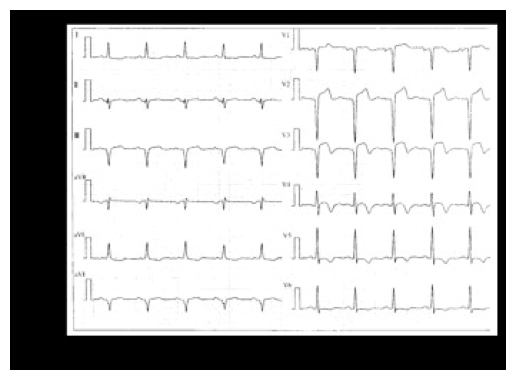

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
image_path = 'res.jpg'  # Replace with the actual image path
image = cv.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Convert image to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Display the grayscale image
    plt.imshow(gray, cmap='gray')
    plt.axis('off')  # Optional: hide the axes
    plt.show()
else:
    print('Failed to load the image.')

In [15]:

plt.imshow(noisy,'gray')

NameError: name 'noisy' is not defined

In [16]:
plt.imshow(dst,'gray')

NameError: name 'dst' is not defined

In [17]:
import cv2
#image = cv2.imread("test.jpg")
image=dst
crop_img = image[15:50+1030, 50:50+1566]
plt.imshow(crop_img,cmap="gray")

NameError: name 'dst' is not defined

In [18]:
img=crop_img
for i in range (0,crop_img.shape[0]-10):
  for j in range (0,crop_img.shape[1]-10):
    if img[i][j]==0:
      #check
      count=0
      for k in range (i-5,i+5):
        for l in range (j-5,j+5):
          if img[k][l]==0:
            count=count+1
      if(count<5):
        img[i][j]=255

plt.imshow(img,cmap="gray")

NameError: name 'crop_img' is not defined

In [19]:
cv2.imwrite('cleaned.jpg',img)

True

In [20]:
import cv2

In [21]:
import matplotlib.pyplot as plt

In [22]:
i = cv2.imread("cleaned.jpg",0)

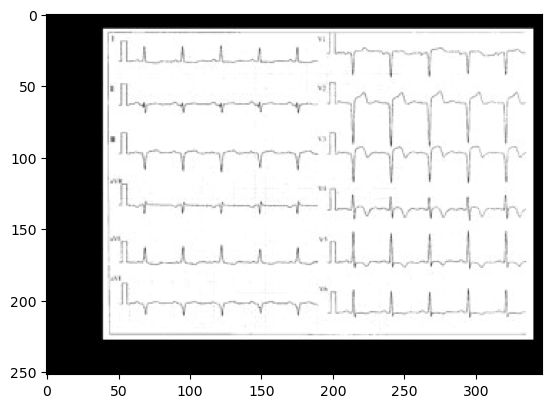

In [23]:
plt.imshow(i,cmap="gray")

In [26]:
print(i)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
i.shape

(252, 347)

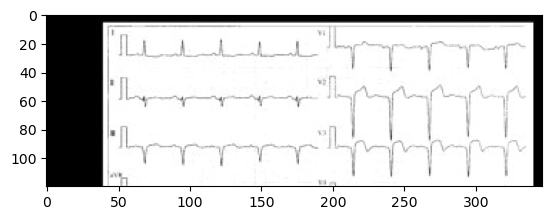

In [28]:
crop_img = i[5:125, 0:725]
plt.imshow(crop_img,cmap="gray")

In [29]:
cv2.imwrite('crop.jpg',crop_img)

True

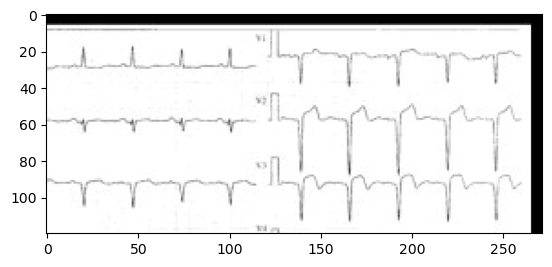

In [31]:
img = crop_img[:,75:725]
plt.imshow(img,cmap="gray")

In [33]:
img.shape

(120, 267)

In [34]:
pixel_from_top=[]
for i in range (0,645):
  id=0
  
  for j in range (0,120):
      if img[j][i]==0:
        pixel_from_top.append(j)
        id=1
        # print("f\n")
        break
        
  
  if id==0:
    # print("nf\n")
    pixel_from_top.append(pixel_from_top[i-1])

IndexError: index 267 is out of bounds for axis 0 with size 267

In [35]:
len(pixel_from_top)


267

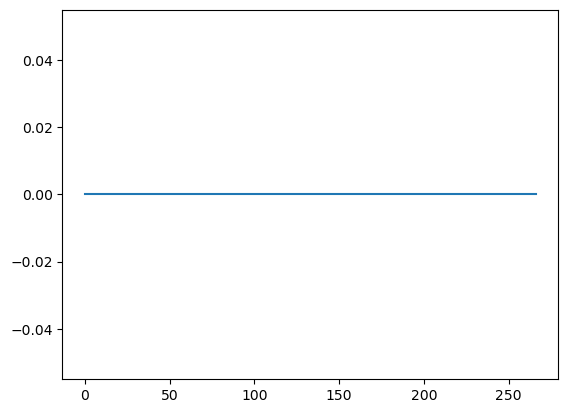

In [36]:
plt.plot(pixel_from_top)

In [37]:
pixel_from_bottom=[]
for i in range (0,645):
  pixel_from_bottom.append(120-pixel_from_top[i])

IndexError: list index out of range

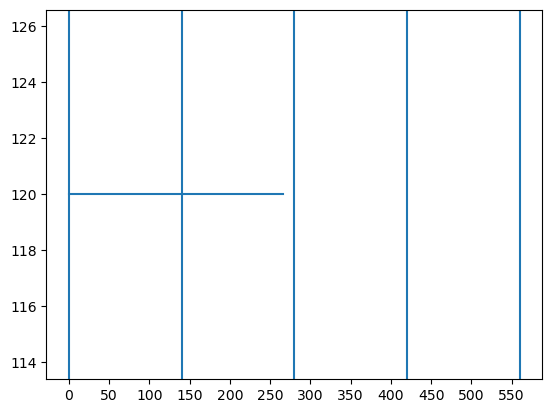

In [38]:
plt.xticks(range(0,700,50))
for i in range (0,645,140):
  plt.axvline(x=i)
plt.plot(pixel_from_bottom)